In [40]:
# ipmort libraries and dependencies
import os
import json
import requests
from pathlib import Path
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import seaborn as sns

%matplotlib inline

In [41]:
# read in csv
csvpath = Path('Resources/temp/.ipynb_checkpoints/pandemic_stock_picks-checkpoint.csv')
cramer_picks_data = pd.read_csv(csvpath, infer_datetime_format=True, parse_dates=True)
cramer_picks_data.sort_index()
cramer_picks_data

,Unnamed: 0,AAPL,AAPL.1,AAPL.2,AAPL.3,AAPL.4,AMD,AMD.1,AMD.2,AMD.3,...,WING,WING.1,WING.2,WING.3,WING.4,ZM,ZM.1,ZM.2,ZM.3,ZM.4
0,NaN,open,high,low,close,volume,open,high,low,close,...,open,high,low,close,volume,open,high,low,close,volume
1,time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-06 00:00:00-05:00,174.67,175.49,173.94,174.51,17535168,23.47,23.53,22.4,22.41,...,66.66,67.0,65.84,65.87,393804,NaN,NaN,NaN,NaN,NaN
3,2019-03-07 00:00:00-05:00,174.02,174.44,172.02,172.47,20110131,22.33,22.4101,21.73,22.07,...,65.69,66.0386,64.8,65.39,280014,NaN,NaN,NaN,NaN,NaN
4,2019-03-08 00:00:00-05:00,170.32,173.07,169.5,172.92,19475688,21.35,22.085,21.035,22.0103,...,65.27,67.16,64.7244,66.65,632366,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,2021-03-01 00:00:00-05:00,123.75,127.93,122.79,127.79,104597017,85.365,86.5,83.97,86.41,...,138.37,140.9332,134.34,140.24,551080,388.66,416.2,387.01,409.66,7892457.0
503,2021-03-02 00:00:00-05:00,128.41,128.72,125.01,125.1601,91481050,86.92,86.95,84.04,84.12,...,141.77,142.37,134.857,136.03,549973,439.6,440.0,371.82,372.6,17621831.0
504,2021-03-03 00:00:00-05:00,124.81,125.71,121.84,122.06,99851557,84.28,84.38,80.85,80.85,...,134.93,135.3,128.67,129.24,609166,383.0,383.25,339.0,341.58,15144463.0
505,2021-03-04 00:00:00-05:00,121.75,123.6,118.62,120.22,160007520,80.23,81.8067,76.78,77.79,...,129.23,129.71,119.25,120.35,614088,347.8,358.2999,333.0,342.7,9727871.0


In [9]:
# filter for closing price
year_close_data = cramer_picks_data[["AAPL.3", "AMD.3", "AMZN.3", "ATVI.3", "COST.3", "CPB.3", "DPZ.3", "ETSY.3", "FB.3", "GOOG.3", "MKC.3", "NFLX.3", "NVDA.3", "OKTA.3", "PEP.3", "PLD.3", "SHOP.3", "TTWO.3", "WING.3", "ZM.3"]].drop([0,1])
year_close_data.apply(pd.to_numeric, axis=0)

,AAPL.3,AMD.3,AMZN.3,ATVI.3,COST.3,CPB.3,DPZ.3,ETSY.3,FB.3,GOOG.3,MKC.3,NFLX.3,NVDA.3,OKTA.3,PEP.3,PLD.3,SHOP.3,TTWO.3,WING.3,ZM.3
2,174.5100,22.4100,1669.16,42.560,219.19,36.14,248.65,70.04,172.51,1157.96,136.47,359.50,152.04,79.9800,116.63,70.17,187.300,87.22,65.87,NaN
3,172.4700,22.0700,1626.28,41.420,216.79,35.92,247.83,67.23,169.14,1143.53,135.66,352.62,149.25,81.2200,116.08,69.52,186.970,88.41,65.39,NaN
4,172.9200,22.0103,1622.11,42.040,227.82,36.01,250.53,67.80,169.60,1142.74,137.05,349.58,150.67,78.4250,115.22,69.94,189.730,87.04,66.65,NaN
5,178.9800,22.9500,1670.32,42.920,229.63,35.90,246.98,70.64,171.98,1175.81,139.05,358.86,161.13,80.9101,116.56,70.99,200.300,89.80,66.81,NaN
6,180.9400,23.4800,1672.42,42.630,232.98,35.06,240.36,71.14,171.94,1192.72,138.41,356.28,162.51,80.6500,116.61,71.64,202.545,89.86,66.87,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,127.7900,86.4100,3146.61,98.750,331.40,45.49,345.21,244.58,264.39,2081.51,84.55,550.70,553.77,269.8100,130.63,99.46,1309.300,187.46,140.24,409.66
503,125.1601,84.1200,3095.99,96.740,328.46,45.63,343.07,238.30,258.95,2076.61,84.92,547.58,536.00,259.3600,131.07,99.10,1308.320,188.18,136.03,372.60
504,122.0600,80.8500,3005.01,93.710,323.91,45.80,332.58,208.61,255.44,2025.80,83.20,520.71,512.38,241.2200,129.08,96.14,1220.080,180.11,129.24,341.58
505,120.2200,77.7900,2977.04,91.511,319.08,45.81,330.53,198.10,257.59,2049.56,82.90,511.03,494.81,226.0900,128.83,95.63,1150.800,174.04,120.35,342.70


In [10]:
# select 1 year data starting on 3/6/2020 and reorder df in alphabetical order
cramer_picks = year_close_data.astype(str).astype(float).loc[255:507, :]
cramer_picks.columns = ["AAPL", "AMD", "AMZN", "ATVI", "COST", "CPB", "DPZ", "ETSY", "FB", "GOOG", "MKC", "NFLX", "NVDA", "OKTA", "PEP", "PLD", "SHOP", "TTWO", "WING", "ZM"]
cramer_picks

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
255,288.9800,48.600,1901.14,59.960,311.340,51.750,336.47,60.61,181.11,1298.41,150.54,368.90,266.070,125.99,137.27,85.83,472.0877,117.71,79.28,114.3300
256,266.0900,43.260,1800.01,57.165,300.945,50.190,336.26,58.50,168.60,1214.51,143.87,346.03,245.010,114.86,130.15,77.76,417.6100,113.83,74.76,113.7500
257,285.6900,45.380,1894.00,60.720,309.670,51.250,344.05,57.97,178.19,1281.01,151.49,364.27,261.080,119.21,134.23,80.86,450.1700,118.75,76.17,108.4858
258,275.3000,45.690,1819.63,59.330,297.270,50.475,332.66,50.21,170.22,1215.10,146.61,349.59,246.160,114.77,129.66,73.72,422.2300,118.90,71.57,110.2600
259,248.0000,39.005,1676.21,54.560,279.635,47.660,315.61,44.04,154.46,1113.84,131.17,312.63,216.035,106.08,115.34,70.17,377.5200,108.35,68.26,109.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,127.7900,86.410,3146.61,98.750,331.400,45.490,345.21,244.58,264.39,2081.51,84.55,550.70,553.770,269.81,130.63,99.46,1309.3000,187.46,140.24,409.6600
503,125.1601,84.120,3095.99,96.740,328.460,45.630,343.07,238.30,258.95,2076.61,84.92,547.58,536.000,259.36,131.07,99.10,1308.3200,188.18,136.03,372.6000
504,122.0600,80.850,3005.01,93.710,323.910,45.800,332.58,208.61,255.44,2025.80,83.20,520.71,512.380,241.22,129.08,96.14,1220.0800,180.11,129.24,341.5800
505,120.2200,77.790,2977.04,91.511,319.080,45.810,330.53,198.10,257.59,2049.56,82.90,511.03,494.810,226.09,128.83,95.63,1150.8000,174.04,120.35,342.7000


In [11]:
# reset index to date for the pandemic picks starting at 03/06/2020
cramer_picks["Date"] = pd.date_range(start="03/06/2020", periods=len(cramer_picks), freq="B")
cramer_picks_end = cramer_picks[["Date", "AAPL", "AMD", "AMZN", "ATVI", "COST", "CPB", "DPZ", "ETSY", "FB", "GOOG", "MKC", "NFLX", "NVDA", "OKTA", "PEP", "PLD", "SHOP", "TTWO", "WING", "ZM"]]
cramer_picks_end.reset_index()
cramer_stocks = cramer_picks_end.set_index("Date")
cramer_stocks.tail()

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
Date,,,,,,,,,,,,,,,,,,,,
2021-02-16,127.7900,86.41,3146.61,98.750,331.40,45.49,345.21,244.58,264.39,2081.51,84.55,550.70,553.77,269.81,130.63,99.46,1309.30,187.46,140.24,409.66
2021-02-17,125.1601,84.12,3095.99,96.740,328.46,45.63,343.07,238.30,258.95,2076.61,84.92,547.58,536.00,259.36,131.07,99.10,1308.32,188.18,136.03,372.60
2021-02-18,122.0600,80.85,3005.01,93.710,323.91,45.80,332.58,208.61,255.44,2025.80,83.20,520.71,512.38,241.22,129.08,96.14,1220.08,180.11,129.24,341.58
2021-02-19,120.2200,77.79,2977.04,91.511,319.08,45.81,330.53,198.10,257.59,2049.56,82.90,511.03,494.81,226.09,128.83,95.63,1150.80,174.04,120.35,342.70
2021-02-22,121.3900,78.53,3000.45,92.560,317.31,46.56,330.15,200.34,264.28,2107.18,84.44,516.38,498.48,215.82,133.05,97.34,1131.00,170.77,120.31,337.67


In [12]:
# calculate percent change of daily returns
daily_returns = cramer_stocks.pct_change() 
daily_returns.tail() * 100

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
Date,,,,,,,,,,,,,,,,,,,,
2021-02-16,5.437294,2.248255,1.754686,3.316593,0.135972,0.043985,-0.329147,11.036455,2.759572,2.352901,0.367996,2.322557,1.016053,3.197552,1.138123,0.383528,2.336233,1.742198,3.004040,9.593365
2021-02-17,-2.057986,-2.650156,-1.608715,-2.035443,-0.887145,0.307760,-0.619913,-2.567667,-2.057566,-0.235406,0.437611,-0.566552,-3.208913,-3.873096,0.336829,-0.361955,-0.074849,0.384082,-3.001997,-9.046526
2021-02-18,-2.476908,-3.887304,-2.938640,-3.132107,-1.385252,0.372562,-3.057685,-12.459085,-1.355474,-2.446776,-2.025436,-4.907046,-4.406716,-6.994139,-1.518273,-2.986882,-6.744527,-4.288447,-4.991546,-8.325282
2021-02-19,-1.507455,-3.784787,-0.930779,-2.346601,-1.491155,0.021834,-0.616393,-5.038109,0.841685,1.172870,-0.360577,-1.859000,-3.429096,-6.272283,-0.193678,-0.530476,-5.678316,-3.370163,-6.878675,0.327888
2021-02-22,0.973216,0.951279,0.786352,1.146310,-0.554720,1.637197,-0.114967,1.130742,2.597151,2.811335,1.857660,1.046905,0.741699,-4.542439,3.275635,1.788142,-1.720542,-1.878878,-0.033236,-1.467756


<AxesSubplot:xlabel='Date'>

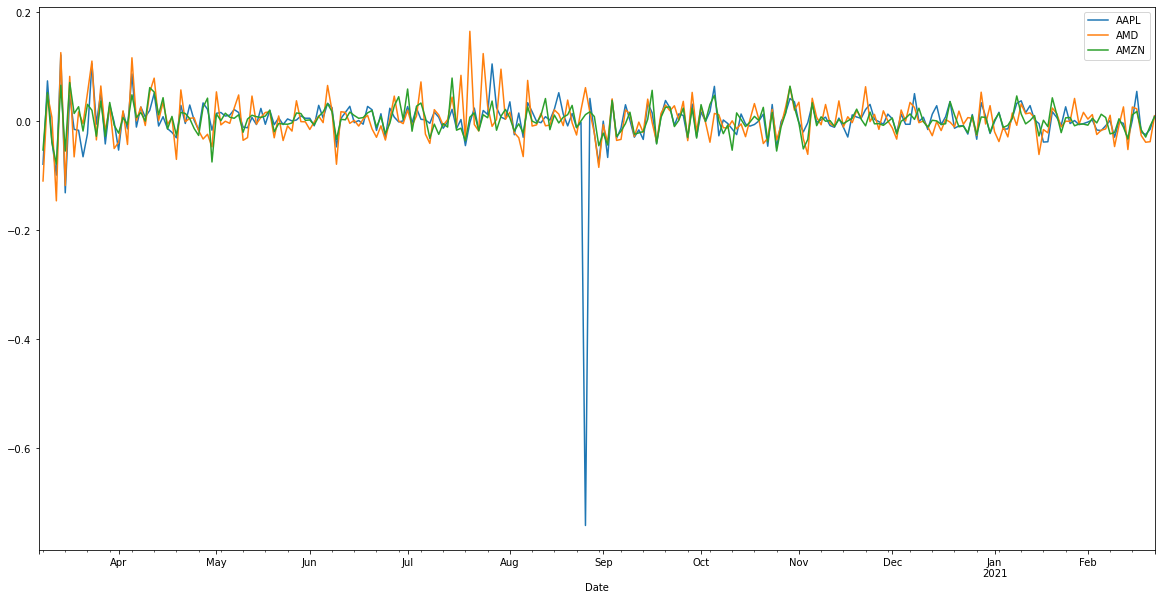

In [13]:
# plot daily returns
first_three = daily_returns.iloc[:, 0:3] 
second_three = daily_returns.iloc[:, 3:6]
third_three = daily_returns.iloc[:, 6:9]
fourth_three = daily_returns.iloc[:, 9:12]
fith_three = daily_returns.iloc[:, 12:15]
sixth_three = daily_returns.iloc[:, 15:18]
last_two = daily_returns.iloc[:, 18:20]
first_three.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

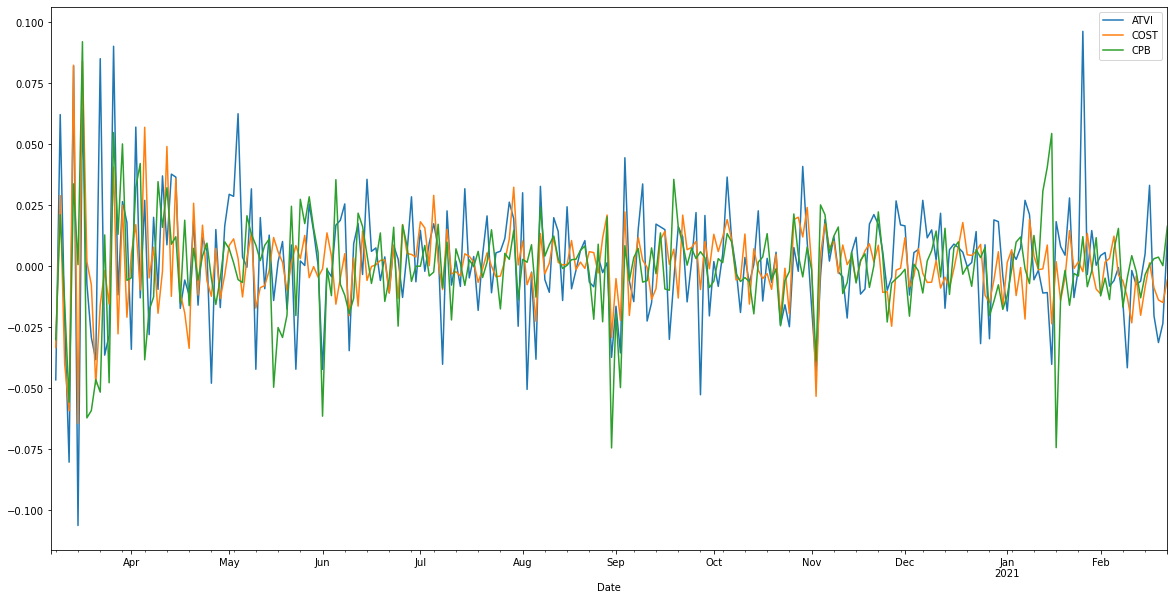

In [14]:
second_three.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

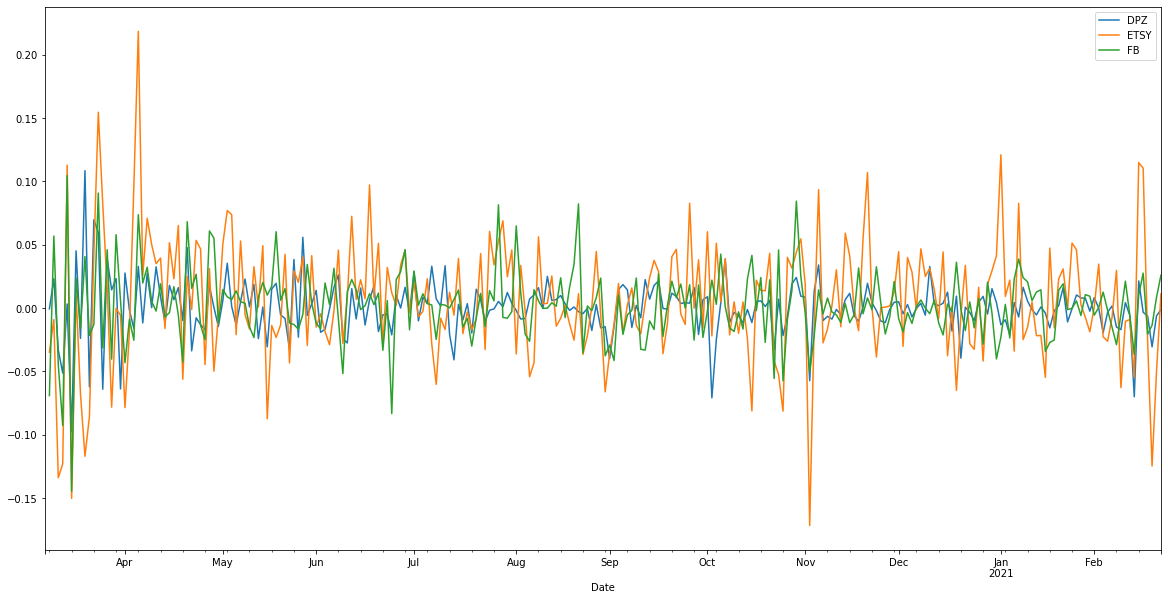

In [15]:
third_three.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

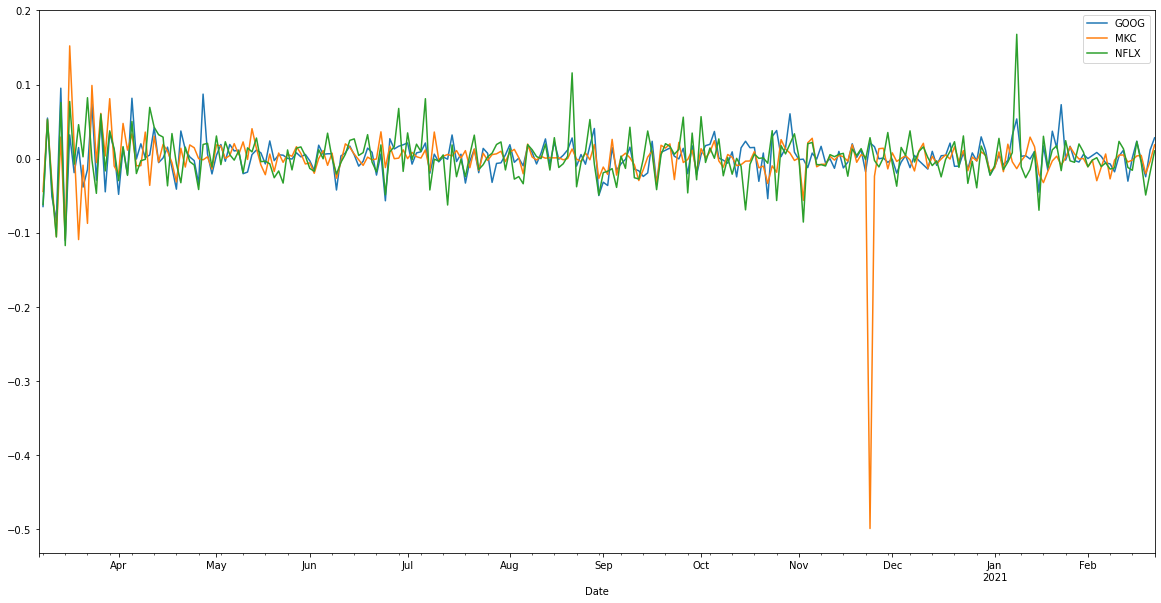

In [16]:
fourth_three.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

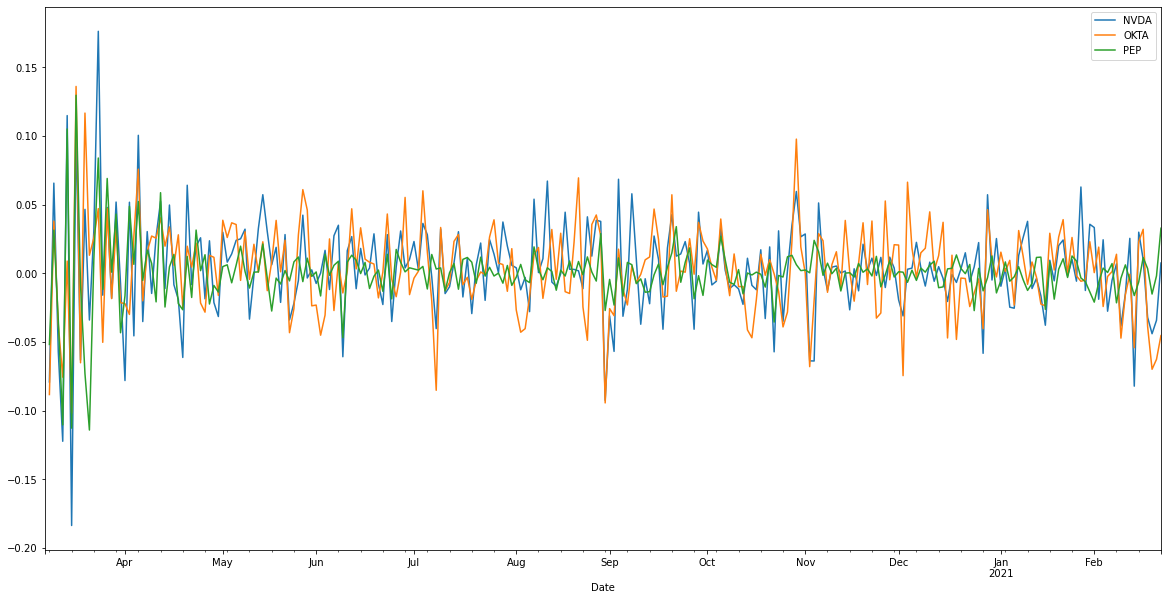

In [17]:
fith_three.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

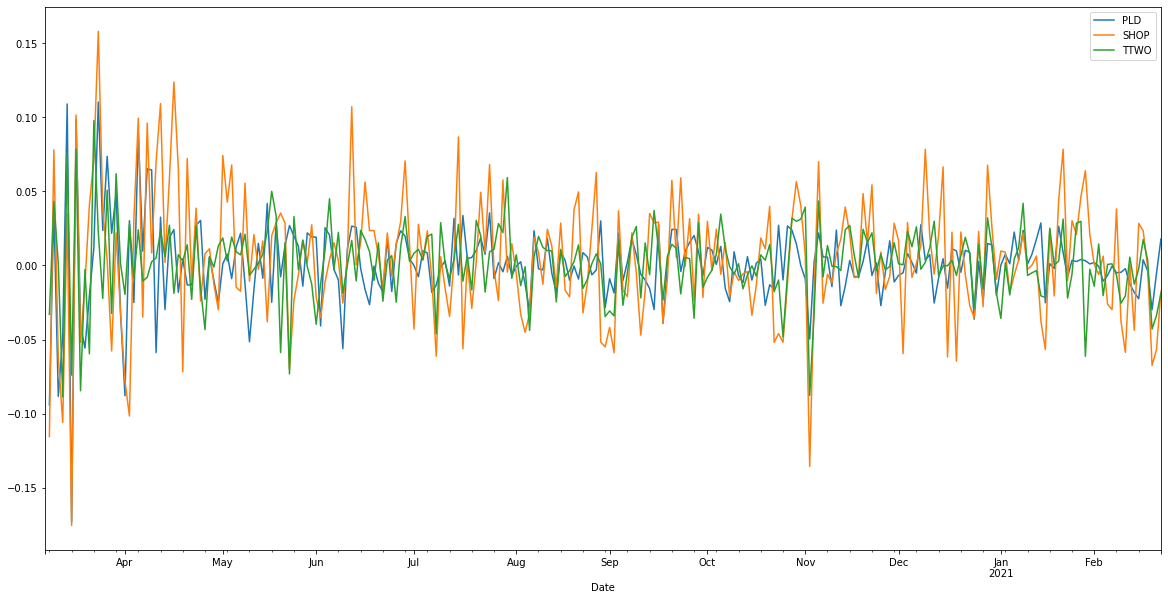

In [18]:
sixth_three.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

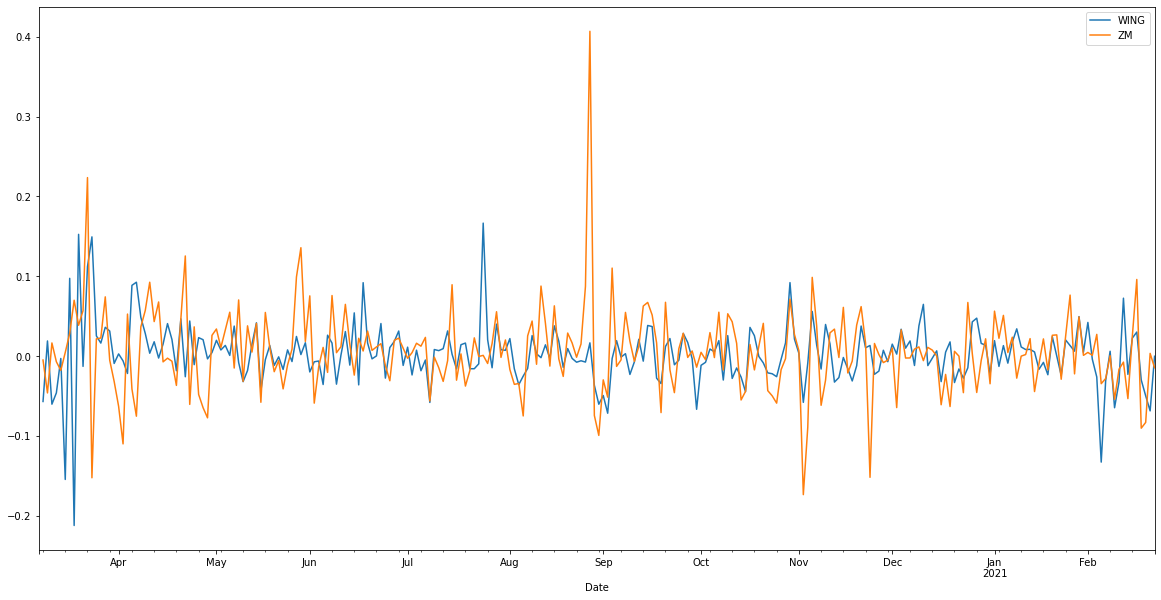

In [19]:
last_two.plot(figsize = (20,10))

In [20]:
# calc cum returns as a percent
cumulative_returns = ((1+daily_returns).cumprod()-1)
cumulative_returns.tail() * 100

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM
Date,,,,,,,,,,,,,,,,,,,,
2021-02-16,-55.778947,77.798354,65.511746,64.693129,6.443117,-12.096618,2.597557,303.530770,45.983104,60.312228,-43.835525,49.281648,108.129440,114.151917,-4.837182,15.880228,177.342536,59.255798,76.892028,258.313653
2021-02-17,-56.689010,73.086420,62.849133,61.340894,5.498812,-11.826087,1.961542,293.169444,42.979405,59.934843,-43.589744,48.435890,101.450746,105.857608,-4.516646,15.460795,177.134948,59.867471,71.581736,225.898714
2021-02-18,-57.761783,66.358025,58.063583,56.287525,4.037387,-11.497585,-1.156121,244.184128,41.041356,56.021596,-44.732297,41.152074,92.573383,91.459640,-5.966344,12.012117,158.443505,53.011639,63.017154,198.766728
2021-02-19,-58.398505,60.061728,56.592360,52.620080,2.486028,-11.478261,-1.765388,226.843755,42.228480,57.851526,-44.931580,38.528056,85.969858,79.450750,-6.148467,11.417919,143.768266,47.854898,51.803734,199.746348
2021-02-22,-57.993633,61.584362,57.823727,54.369580,1.917518,-10.028986,-1.878325,230.539515,45.922368,62.289261,-43.908596,39.978314,87.349194,71.299309,-3.074233,13.410230,139.574130,45.076884,51.753280,195.346803


In [21]:
# mean cum return
cumulative_returns.iloc[-1].mean()

0.5206753507491133

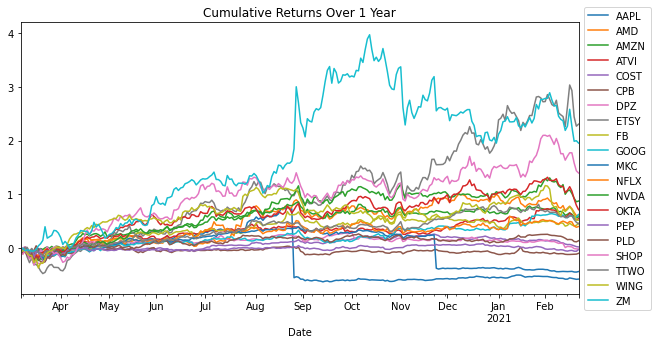

In [22]:
# display cum return
cumulative_returns.plot(figsize=(10,5), title = "Cumulative Returns Over 1 Year").legend(loc = "center left", bbox_to_anchor = (1.0, 0.5));

In [23]:
# calc standard deveation
standard_dev = cumulative_returns.std()
standard_dev 

AAPL    0.416059
AMD     0.357233
AMZN    0.239832
ATVI    0.182882
COST    0.095940
CPB     0.040355
DPZ     0.073312
ETSY    0.871029
FB      0.209485
GOOG    0.194994
MKC     0.282438
NFLX    0.156699
NVDA    0.411668
OKTA    0.358295
PEP     0.050107
PLD     0.106918
SHOP    0.545881
TTWO    0.237721
WING    0.297793
ZM      1.085934
dtype: float64

<AxesSubplot:title={'center':'Standard Deviation'}>

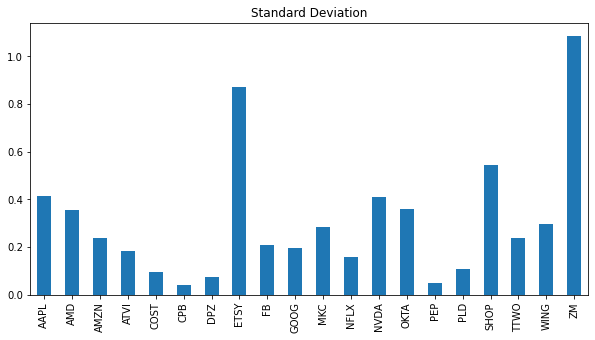

In [24]:
# plot standard dev
standard_dev.plot.bar(figsize = (10,5), title = "Standard Deviation")

In [25]:
# calc cramer picks sharpe ratio
cramer_sharpe_ratio = ( 
    daily_returns.mean() * 252 / (daily_returns.std() * np.sqrt(252))
)
cramer_sharpe_ratio

AAPL   -0.173621
AMD     1.104571
AMZN    1.388970
ATVI    1.298302
COST    0.203346
CPB    -0.175815
DPZ     0.119158
ETSY    1.962498
FB      1.057938
GOOG    1.451987
MKC    -0.500925
NFLX    0.929459
NVDA    1.388051
OKTA    1.297970
PEP     0.097132
PLD     0.509060
SHOP    1.625355
TTWO    1.125239
WING    0.990236
ZM      1.680219
dtype: float64

In [26]:
# read in snp csv
snp500_data = Path("snp_data_5Y.csv")
snp500_df = pd.read_csv(snp500_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)
snp500 = snp500_df.drop(columns=["High", "Open", "Low", "Volume"])
snp500.columns = ["S&P 500"]
snp500

,S&P 500
Date,
2021-05-28,4204.11
2021-05-27,4200.88
2021-05-26,4195.99
2021-05-25,4188.13
2021-05-24,4197.05
...,...
2016-06-07,2112.13
2016-06-06,2109.41
2016-06-03,2099.13


In [27]:
# filter 1 year data starting 03/06/2020
snp_data_1year = snp500.iloc[59:311, :]
snp_data_1year

,S&P 500
Date,
2021-03-05,3841.94
2021-03-04,3768.47
2021-03-03,3819.72
2021-03-02,3870.29
2021-03-01,3901.82
...,...
2020-03-12,2480.64
2020-03-11,2741.38
2020-03-10,2882.23


<AxesSubplot:title={'center':'SnP 500 1 Year Returns'}, xlabel='Date'>

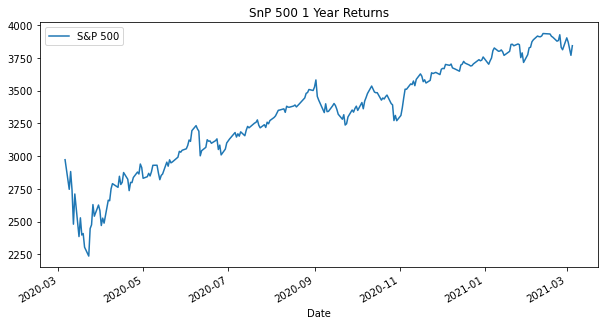

In [28]:
# plot 1 year data
snp_data_1year.plot(figsize=(10,5), title="SnP 500 1 Year Returns")

In [29]:
# calc percent change 
snp_data_1year.pct_change() * 100

,S&P 500
Date,
2021-03-05,NaN
2021-03-04,-1.912315
2021-03-03,1.359968
2021-03-02,1.323919
2021-03-01,0.814668
...,...
2020-03-12,-8.497909
2020-03-11,10.510997
2020-03-10,5.137923


In [30]:
# calc average percent change
snp_change = snp_data_1year.pct_change() * 100
snp_change.mean()

S&P 500   -0.079531
dtype: float64

In [31]:
# find sharpe ratio of snp500
snp500_sharpe_ratio = (
    snp_data_1year.mean() / (snp_data_1year.std() * np.sqrt(252))
)

snp500_sharpe_ratio

S&P 500    0.527627
dtype: float64

In [32]:
# combine snp and cramer df with .concat function
combined_df = pd.concat([cramer_stocks, snp_data_1year], axis = "columns", join = "inner")
combined_df

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-06,288.9800,48.600,1901.14,59.960,311.340,51.750,336.47,60.61,181.11,1298.41,...,368.90,266.070,125.99,137.27,85.83,472.0877,117.71,79.28,114.3300,2972.37
2020-03-09,266.0900,43.260,1800.01,57.165,300.945,50.190,336.26,58.50,168.60,1214.51,...,346.03,245.010,114.86,130.15,77.76,417.6100,113.83,74.76,113.7500,2746.56
2020-03-10,285.6900,45.380,1894.00,60.720,309.670,51.250,344.05,57.97,178.19,1281.01,...,364.27,261.080,119.21,134.23,80.86,450.1700,118.75,76.17,108.4858,2882.23
2020-03-11,275.3000,45.690,1819.63,59.330,297.270,50.475,332.66,50.21,170.22,1215.10,...,349.59,246.160,114.77,129.66,73.72,422.2300,118.90,71.57,110.2600,2741.38
2020-03-12,248.0000,39.005,1676.21,54.560,279.635,47.660,315.61,44.04,154.46,1113.84,...,312.63,216.035,106.08,115.34,70.17,377.5200,108.35,68.26,109.4700,2480.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-16,127.7900,86.410,3146.61,98.750,331.400,45.490,345.21,244.58,264.39,2081.51,...,550.70,553.770,269.81,130.63,99.46,1309.3000,187.46,140.24,409.6600,3932.59
2021-02-17,125.1601,84.120,3095.99,96.740,328.460,45.630,343.07,238.30,258.95,2076.61,...,547.58,536.000,259.36,131.07,99.10,1308.3200,188.18,136.03,372.6000,3931.33
2021-02-18,122.0600,80.850,3005.01,93.710,323.910,45.800,332.58,208.61,255.44,2025.80,...,520.71,512.380,241.22,129.08,96.14,1220.0800,180.11,129.24,341.5800,3913.97


In [33]:
# create price correlation df
price_correlation = combined_df.corr()
price_correlation

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM,S&P 500
AAPL,1.000000,-0.525723,-0.303798,-0.316997,-0.615658,0.574634,-0.021263,-0.498885,-0.356331,-0.476445,...,-0.341350,-0.539831,-0.437612,-0.322751,-0.232551,-0.334955,-0.435411,0.042123,-0.688694,-0.497127
AMD,-0.525723,1.000000,0.879566,0.821436,0.897818,-0.171662,0.575250,0.866402,0.870196,0.813626,...,0.840461,0.937106,0.866969,0.759254,0.795760,0.852191,0.933160,0.710472,0.816113,0.902642
AMZN,-0.303798,0.879566,1.000000,0.851660,0.815853,-0.041451,0.752590,0.799559,0.949992,0.778770,...,0.942244,0.939274,0.886219,0.730061,0.907465,0.912921,0.863630,0.855780,0.820900,0.871892
ATVI,-0.316997,0.821436,0.851660,1.000000,0.637916,-0.163215,0.502516,0.940943,0.798795,0.903245,...,0.914050,0.853718,0.940284,0.597277,0.789570,0.966761,0.927888,0.820979,0.663484,0.914860
COST,-0.615658,0.897818,0.815853,0.637916,1.000000,-0.130125,0.570605,0.729864,0.829702,0.705252,...,0.738582,0.890058,0.771242,0.808701,0.722567,0.712700,0.797723,0.518238,0.874773,0.794756
CPB,0.574634,-0.171662,-0.041451,-0.163215,-0.130125,1.000000,0.230849,-0.274214,-0.043315,-0.232139,...,-0.081717,-0.212564,-0.188183,0.211558,0.020538,-0.143430,-0.198076,0.169765,-0.317015,-0.222242
DPZ,-0.021263,0.575250,0.752590,0.502516,0.570605,0.230849,1.000000,0.364660,0.732759,0.327817,...,0.663334,0.649606,0.564047,0.628321,0.735862,0.588802,0.504555,0.748546,0.600028,0.487504
ETSY,-0.498885,0.866402,0.799559,0.940943,0.729864,-0.274214,0.364660,1.000000,0.764673,0.938937,...,0.861977,0.870025,0.942445,0.602340,0.720499,0.930912,0.947486,0.679599,0.724065,0.942407
FB,-0.356331,0.870196,0.949992,0.798795,0.829702,-0.043315,0.732759,0.764673,1.000000,0.790479,...,0.878238,0.939175,0.863171,0.748855,0.878622,0.870120,0.828920,0.797857,0.828192,0.874024
GOOG,-0.476445,0.813626,0.778770,0.903245,0.705252,-0.232139,0.327817,0.938937,0.790479,1.000000,...,0.832373,0.853324,0.906742,0.599304,0.728228,0.893558,0.879541,0.646743,0.676156,0.939082


<AxesSubplot:>

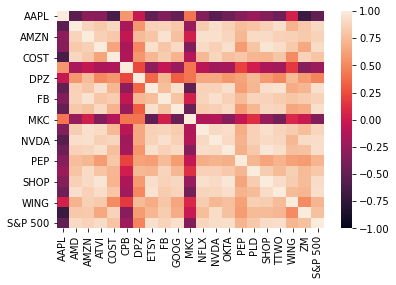

In [34]:
# SnP and Cramer pick heatmap of price corr
sns.heatmap(price_correlation, vmin = -1, vmax = 1)

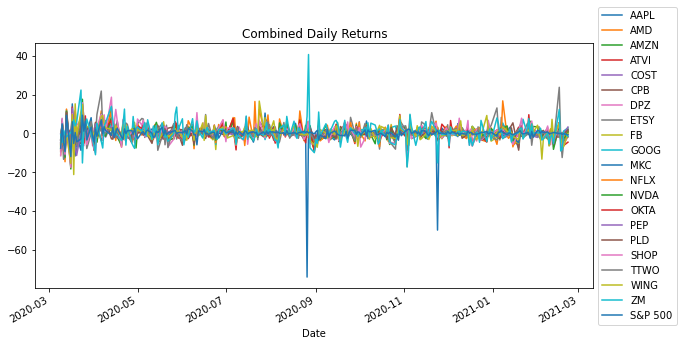

In [35]:
# plot combined daily returns as a percentage
combined_daily_returns = (combined_df.pct_change()) * 100
combined_daily_returns.plot(figsize = (10,5), title = "Combined Daily Returns").legend(loc = "center left", bbox_to_anchor = (1.0, 0.5));

In [36]:
# display daily return correlation between SnP and Cramer Portfolio with .corr
correlation = combined_daily_returns.corr()
correlation

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,PEP,PLD,SHOP,TTWO,WING,ZM,S&P 500
AAPL,1.000000,0.261324,0.354372,0.293229,0.358017,0.175341,0.262926,0.283491,0.409588,0.397816,...,0.273174,0.386515,0.201828,0.345416,0.342097,0.262453,0.285717,0.231854,-0.014335,0.241783
AMD,0.261324,1.000000,0.621342,0.558229,0.572429,0.290828,0.456952,0.450924,0.557441,0.566690,...,0.512655,0.780069,0.559526,0.516857,0.503667,0.602070,0.605773,0.496691,0.204300,0.405654
AMZN,0.354372,0.621342,1.000000,0.625916,0.626993,0.277608,0.458560,0.464482,0.689937,0.664669,...,0.714035,0.666052,0.592485,0.495477,0.456520,0.578108,0.582987,0.366643,0.290528,0.333234
ATVI,0.293229,0.558229,0.625916,1.000000,0.578123,0.324857,0.424975,0.477987,0.517061,0.545849,...,0.633313,0.603514,0.537636,0.546906,0.458359,0.517224,0.736711,0.337853,0.314415,0.350314
COST,0.358017,0.572429,0.626993,0.578123,1.000000,0.413088,0.425972,0.425159,0.559045,0.610855,...,0.541048,0.671011,0.422315,0.710082,0.570919,0.445417,0.566209,0.261743,0.113917,0.455866
CPB,0.175341,0.290828,0.277608,0.324857,0.413088,1.000000,0.219588,0.192683,0.257224,0.262681,...,0.238885,0.297102,0.266840,0.515322,0.300087,0.189692,0.337749,0.174988,0.016923,0.201809
DPZ,0.262926,0.456952,0.458560,0.424975,0.425972,0.219588,1.000000,0.356517,0.427683,0.402004,...,0.451285,0.534640,0.487210,0.387319,0.305774,0.447359,0.484500,0.529409,0.221366,0.306778
ETSY,0.283491,0.450924,0.464482,0.477987,0.425159,0.192683,0.356517,1.000000,0.383905,0.410005,...,0.407913,0.541313,0.528660,0.447174,0.451630,0.663961,0.485716,0.486817,0.330620,0.351447
FB,0.409588,0.557441,0.689937,0.517061,0.559045,0.257224,0.427683,0.383905,1.000000,0.789770,...,0.563539,0.674545,0.465053,0.548261,0.572633,0.506420,0.487638,0.416731,0.056735,0.458204
GOOG,0.397816,0.566690,0.664669,0.545849,0.610855,0.262681,0.402004,0.410005,0.789770,1.000000,...,0.546898,0.718063,0.450676,0.626731,0.624947,0.479081,0.454121,0.386594,0.020711,0.519803


In [37]:
# calculate each stocks covariance 
AAPLcovariance = combined_daily_returns["AAPL"].cov(combined_daily_returns["S&P 500"])
AMDcovariance = combined_daily_returns["AMD"].cov(combined_daily_returns["S&P 500"])
AMZNcovariance = combined_daily_returns["AMZN"].cov(combined_daily_returns["S&P 500"])
ATVIcovariance = combined_daily_returns["ATVI"].cov(combined_daily_returns["S&P 500"])
COSTcovariance = combined_daily_returns["COST"].cov(combined_daily_returns["S&P 500"])
CPBcovariance = combined_daily_returns["CPB"].cov(combined_daily_returns["S&P 500"])
DPZcovariance = combined_daily_returns["DPZ"].cov(combined_daily_returns["S&P 500"])
ETSYcovariance = combined_daily_returns["ETSY"].cov(combined_daily_returns["S&P 500"])
FBcovariance = combined_daily_returns["FB"].cov(combined_daily_returns["S&P 500"])
GOOGcovariance = combined_daily_returns["GOOG"].cov(combined_daily_returns["S&P 500"])
MKCcovariance = combined_daily_returns["MKC"].cov(combined_daily_returns["S&P 500"])
NFLXcovariance = combined_daily_returns["NFLX"].cov(combined_daily_returns["S&P 500"])
NVDAcovariance = combined_daily_returns["NVDA"].cov(combined_daily_returns["S&P 500"])
OKTAcovariance = combined_daily_returns["OKTA"].cov(combined_daily_returns["S&P 500"])
PEPcovariance = combined_daily_returns["PEP"].cov(combined_daily_returns["S&P 500"])
PLDcovariance = combined_daily_returns["PLD"].cov(combined_daily_returns["S&P 500"])
SHOPcovariance = combined_daily_returns["SHOP"].cov(combined_daily_returns["S&P 500"])
TTWOcovariance = combined_daily_returns["TTWO"].cov(combined_daily_returns["S&P 500"])
WINGcovariance = combined_daily_returns["WING"].cov(combined_daily_returns["S&P 500"])
ZMcovariance = combined_daily_returns["ZM"].cov(combined_daily_returns["S&P 500"])

In [38]:
# calculate each stocks variance
AAPLvariance = combined_daily_returns["AAPL"].var()
AMDvariance = combined_daily_returns["AMD"].var()
AMZNvariance = combined_daily_returns["AMZN"].var()
ATVIvariance = combined_daily_returns["ATVI"].var()
COSTvariance = combined_daily_returns["COST"].var()
CPBvariance = combined_daily_returns["CPB"].var()
DPZvariance = combined_daily_returns["DPZ"].var()
ETSYvariance = combined_daily_returns["ETSY"].var()
FBvariance = combined_daily_returns["FB"].var()
GOOGvariance = combined_daily_returns["GOOG"].var()
MKCvariance = combined_daily_returns["MKC"].var()
NFLXvariance = combined_daily_returns["NFLX"].var()
NVDAvariance = combined_daily_returns["NVDA"].var()
OKTAvariance = combined_daily_returns["OKTA"].var()
PEPvariance = combined_daily_returns["PEP"].var()
PLDvariance = combined_daily_returns["PLD"].var()
SHOPvariance = combined_daily_returns["SHOP"].var()
TTWOvariance = combined_daily_returns["TTWO"].var()
WINGvariance = combined_daily_returns["WING"].var()
ZMvariance = combined_daily_returns["ZM"].var()

In [39]:
# Calculate Beta 
AAPLbeta = AAPLcovariance / AAPLvariance
print(f"AAPL Beta is {AAPLbeta}")

AMDbeta = AMDcovariance / AMDvariance
print(f"AMD Beta is {AMDbeta}")

AMZNbeta = AMZNcovariance / AMZNvariance
print(f"AMZN Beta is {AMZNbeta}")

ATVIbeta = ATVIcovariance / ATVIvariance
print(f"ATVI Beta is {ATVIbeta}")

COSTbeta = COSTcovariance / COSTvariance
print(f"COST Beta is {COSTbeta}")

CPBbeta = CPBcovariance / CPBvariance
print(f"CPB Beta is {CPBbeta}")

DPZbeta = DPZcovariance / DPZvariance
print(f"DPZ Beta is {DPZbeta}")

ETSYbeta = ETSYcovariance / ETSYvariance
print(f"ETSY Beta is {ETSYbeta}")

FBbeta = FBcovariance / FBvariance
print(f"FB Beta is {FBbeta}")

GOOGbeta = GOOGcovariance / GOOGvariance
print(f"GOOG Beta is {GOOGbeta}")

MKCbeta = MKCcovariance / MKCvariance
print(f"MKC Beta is {MKCbeta}")

NVDAbeta = NVDAcovariance / NVDAvariance
print(f"NVDA Beta is {NVDAbeta}")

OKTAbeta = OKTAcovariance / OKTAvariance
print(f"OKTA Beta is {OKTAbeta}")

PEPbeta = PEPcovariance / PEPvariance
print(f"PEP Beta is {PEPbeta}")

PLDbeta = PLDcovariance / PLDvariance
print(f"PLD Beta is {PLDbeta}")

SHOPbeta = SHOPcovariance / SHOPvariance
print(f"SHOP Beta is {SHOPbeta}")

TTWObeta = TTWOcovariance / TTWOvariance
print(f"TTWO Beta is {TTWObeta}")

WINGbeta = WINGcovariance / WINGvariance
print(f"WING Beta is {WINGbeta}")

ZMbeta = ZMcovariance / ZMvariance
print(f"ZM Beta is {ZMbeta}")

AAPL Beta is 0.09147398766307818
AMD Beta is 0.2223422821488394
AMZN Beta is 0.28003462747813773
ATVI Beta is 0.2930954399995144
COST Beta is 0.5683796124263163
CPB Beta is 0.20728397093302084
DPZ Beta is 0.2941375019754289
ETSY Beta is 0.1490404074009214
FB Beta is 0.3301783243057224
GOOG Beta is 0.44625531083641035
MKC Beta is 0.13227040802819087
NVDA Beta is 0.2733241519768905
OKTA Beta is 0.19940269051779022
PEP Beta is 0.5446368175764803
PLD Beta is 0.43338264537216814
SHOP Beta is 0.15444864863929733
TTWO Beta is 0.272288227219761
WING Beta is 0.17482486572430775
ZM Beta is -0.04688943038212574
